<a href="https://colab.research.google.com/github/siahw/pytorch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from tqdm import tqdm

In [45]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [46]:
x=np.arange(-5.0,5.0,0.1) #-5.0에서 5.0 사이의 0.1 간격으로 출력
print(x)
# for i in range(1,10+1), 1에서 10까지 출력

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

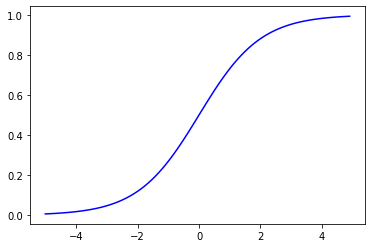

In [47]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y,'b')

#함수의 모양(W)과 위치(b)를 결정하는 계수
#W값에 따른 그래프 모양의 변화

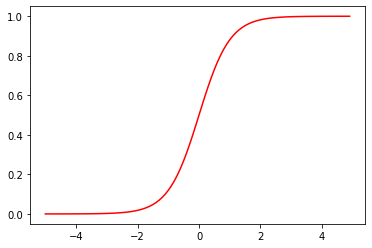

In [48]:
y2=sigmoid(2*x)
plt.plot(x,y2,'r')

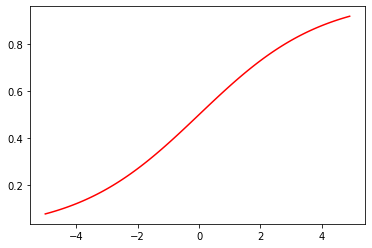

In [49]:
y3=sigmoid(0.5*x)
plt.plot(x,y3,'r')

#b값에 따른 그래프 모양의 변화

In [50]:
x=np.arange(-5.0,5.0,0.1) #-5.0에서 5.0 사이의 0.1 간격으로 출력
y1=sigmoid(x+0.5)
y2=sigmoid(x+1)
y3=sigmoid(x+1.5)

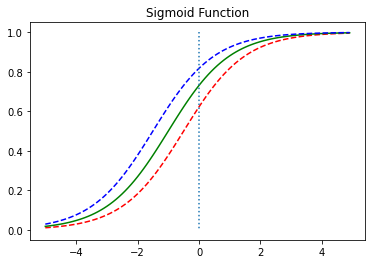

In [51]:
plt.plot(x,y1,'r',linestyle='--')#x+0.5
plt.plot(x,y2,'g') #x+1
plt.plot(x,y3,'b',linestyle='--')#x+1.5
plt.plot([0,0],[1.0,0.0],':')#가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#로지스틱 회귀 구현 해보기

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [53]:
torch.manual_seed(1)

In [54]:
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [55]:
W=torch.zeros((2,1),requires_grad=True) #크기는 2x1,Wx를 계산한 결과물이 1차원이 되도록
b=torch.zeros(1,requires_grad=True)

In [56]:
h=1/(1+torch.exp(-(x_train.matmul(W)+b)))

In [57]:
print(h)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [58]:
loss=-(y_train*torch.log(h)+(1-y_train)*torch.log(1-h))
print(loss)
cost=loss.mean()
print(cost)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [59]:
cost= F.binary_cross_entropy(h,y_train)

#학습

In [64]:
W=torch.zeros((2,1),requires_grad=True) #크기는 2x1,Ax를 계산한 결과물이 1차원이 되도록
b=torch.zeros(1,requires_grad=True)
optimizer=optim.SGD([W,b],lr=1) #로컬미디멈 문제 해결하기 위해 optimizer를 쓰고, lr은 leraning rate이다
num_epochs=1000
for epoch in tqdm(range(num_epochs)):
  #cost
  h=torch.sigmoid(x_train.matmul(W)+b)
  cost=F.binary_cross_entropy(h,y_train)

#backpropagation
optimizer.zero_grad()
cost.backward()
optimizer.step()

#로그 출력
if epoch%100==0:
  print('Epoch{:4d}/{} Cost:{:,6f}',format(
      epoch,num_epochs,cost.item()

  ))

100%|██████████| 1000/1000 [00:00<00:00, 30060.45it/s]


In [67]:
print(torch.sigmoid(x_train.matmul(W)+b))
hypo=torch.sigmoid(x_train.matmul(W)+b)
prediction=hypo>=torch.FloatTensor([0.5])
print(prediction)

tensor([[0.7471],
        [0.8808],
        [0.9181],
        [0.9707],
        [0.9859],
        [0.9921]], grad_fn=<SigmoidBackward>)
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
